

# Clasificación: Regresión Logística

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import seaborn as sns

Vamos a estudiar los conceptos básicos de Clasificación focalizandonos en la Regresión Logística y emplearemos el api de sckit-learn.



Para empezar, vamos a crear un dataset que podamos aplicar en un problema de clasificación.
Será un problema de clasificación binaria en el que utilizaremos dos predictores.

In [ ]:
from sklearn.datasets import make_blobs
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [ ]:
X, y = make_blobs(centers=2, random_state=0, n_samples=200)
#clusters de datos con distribución gaussiana

X ~ n_samples x n_features: (200, 2)
y ~ n_samples: (200,)

First 5 samples:
 [[2.8219307  1.25395648]
 [1.65581849 1.26771955]
 [3.12377692 0.44427786]
 [1.4178305  0.50039185]
 [2.50904929 5.7731461 ]]

First 5 labels: [1 1 1 1 0]


In [ ]:
X.shape

(200, 2)

In [ ]:
y.shape

(200,)

In [ ]:
print('X ~ n_samples x n_features:', X.shape)
print('y ~ n_samples:', y.shape)

print('\nFirst 5 samples:\n', X[:5, :])
print('\nFirst 5 labels:', y[:5])

X ~ n_samples x n_features: (200, 2)
y ~ n_samples: (200,)

First 5 samples:
 [[2.8219307  1.25395648]
 [1.65581849 1.26771955]
 [3.12377692 0.44427786]
 [1.4178305  0.50039185]
 [2.50904929 5.7731461 ]]

First 5 labels: [1 1 1 1 0]




Como hemos hecho que nuestros datos sean bidimiensionales, podemos mostrarlos en un plot 2D donde la primera característica corresponda al eje *x* y la segunda característica al eje *y*.

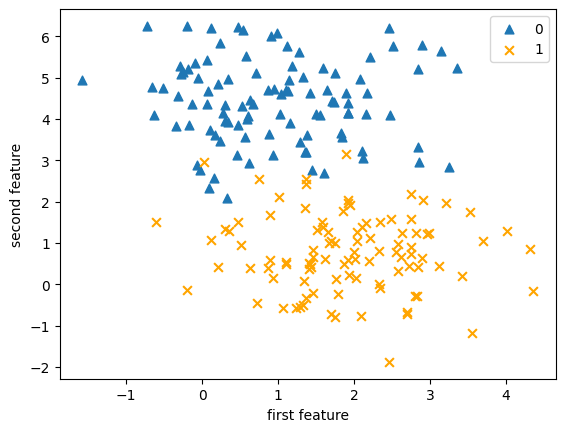

In [ ]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label='0', marker='^')
#X[y==0,0], x co-ordinate, where y is 0 take X[0] as x-coordinate.
#X[y==0,1], y co-ordinate, where y is 0 take X[1] as y-coordinate.

plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label='1', c='orange', marker='x')
#X[y==1,0], x co-ordinate, where y is 0 take X[0] as x-coordinate.
#X[y==1,1], y co-ordinate, where y is 0 take X[1] as y-coordinate.

plt.xlabel('first feature')
plt.ylabel('second feature')

plt.legend(loc='upper right');



Para evaluar los modelos que vamos a crear, vamos a separar el dataset en *train* y *test*. Recordad que estos dos conjuntos nos permiten:

1. **Training**: Ajustar el modelo a los datos de entrenamiento.
2. **Test**: Evaluar la capacidad de generalizar del modelo.


Para separar los dos conjuntos utilizamos la función `train_test_split` del módulo `model_selection`. Separaremos ambos conjuntos con un ratio de 75/25.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)
# stratify=y:
# y es una variable categórica binaria con valores 0 y 1
# si hay un 25% de 0's y un 75% de 1's, stratify=y asegurará que los subsets train y test contengan un 25% de 0's y un 75% de 1's.

In [ ]:
X_train.shape

(150, 2)

In [ ]:
y_train.shape

(150,)



Todos los algoritmos implementados en scikit-learn figuran con objetos de tipo *Estimator*.

- `Estimator.`**`fit(X, y)`**: ajusta los parámetros del modelo a los datos
- `Predictor.`**`predict(X)`**: predicce los valores de salida para datos nuevos
- `Model.`**`score(X, y)`**: evalúa los resultados de la predicción

Nosotros utilizaremos el objeto LogisticRegression para nuestra tarea de clasificación:

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()



Para entrenar el modelo, simplemente tenemos que llamar al método **`fit`** de nuestro objeto `classifier`, indicándole los datos de entrenamiento y las etiquetas asociadas a esos datos:

In [ ]:
#Estimator.fit(X, y): ajusta los parámetros del modelo a los datos
classifier.fit(X_train, y_train)

LogisticRegression()



Una vez tenemos el modelo entrenado, podemos empezar a realizar predicciones con datos nuevos. Para el aprendizaje supervisado, o algunos problemas no supervisados se utiliza el método predict.
predicción = predictor.predict(datos)

In [ ]:
#Predictor.predict(X): predicce los valores de salida para datos nuevos
prediction = classifier.predict(X_test)
prediction

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1])

Sin embargo, los algoritmos de clasificación también ofrecen una forma de cuantificar la certeza de una predicción usando el método predict_proba:

probabilidad = predictor.predict_proba(datos)

In [ ]:
classifier.predict_proba(X_test).round(2)
# X_test.shape (50,2)

array([[0.15, 0.85],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.01, 0.99],
       [0.99, 0.01],
       [0.06, 0.94],
       [0.49, 0.51],
       [0.41, 0.59],
       [0.91, 0.09],
       [0.16, 0.84],
       [0.1 , 0.9 ],
       [0.81, 0.19],
       [0.02, 0.98],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.6 , 0.4 ],
       [0.86, 0.14],
       [1.  , 0.  ],
       [0.02, 0.98],
       [0.97, 0.03],
       [0.95, 0.05],
       [0.57, 0.43],
       [1.  , 0.  ],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.96, 0.04],
       [0.06, 0.94],
       [0.18, 0.82],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.06, 0.94],
       [0.65, 0.35],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.99,

In [ ]:
X_test.shape

(50, 2)



Podemos comparar visualmente las predicciones con los valores de $y$ reales:

In [ ]:
print(prediction[:20])
print(y_test[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0]
[1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0]




Para evaluarlo cuantitativamente, podemos computar qué fracción de las predicciones es correcta. A esta métrica se le llama **accuracy**:

In [ ]:
np.mean(prediction == y_test)

0.92



Por supuesto, scikit-learn nos provee la función **`score`** para computar el **accuracy** directamente:

In [ ]:
classifier.score(X_test, y_test)

0.92



Suele ser muy útil comparar la capacidad de generalización del modelo en el conjunto de test con el accuracy en los datos de entrenamiento (veremos por qué más adelante):


In [ ]:
classifier.score(X_train, y_train)

0.9866666666666667



La Regresión Logística es un modelo lineal, esto es, un modelo que crea una decisión que es lineal en el espacio de entrada. En nuestro dataset, esto significa que el umbral de decisión es una recta que separa las dos variables de entrada:

In [ ]:
# ttps://scikit-learn.org/0.17/auto_examples/linear_model/plot_iris_logistic.html

def plot_decision_regions(clf,X,y,fig=None,title='',figsize=(7, 6)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .05  # step size in the mesh

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    if fig is None:
        plt.figure(figsize=figsize)
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', linewidths=1.5, s=80)
        # plt.scatter(X.values[:, 0], X.values[:, 1], c=y,
        #             cmap=plt.cm.Paired, edgecolors='k', linewidths=1.5, s=80)
        plt.title(title)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xticks(())
        plt.yticks(())
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
    else:
        fig.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)

        fig.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', linewidths=1.5, s=80)
        # fig.scatter(X.values[:, 0], X.values[:, 1], c=y,
        #             cmap=plt.cm.Paired, edgecolors='k', linewidths=1.5, s=80)

        fig.set_title(title)
        fig.set_xlabel('Feature 1')
        fig.set_ylabel('Feature 2')
        fig.set_xticks(())
        fig.set_yticks(())
        fig.set_xlim(xx.min(), xx.max())
        fig.set_ylim(yy.min(), yy.max())

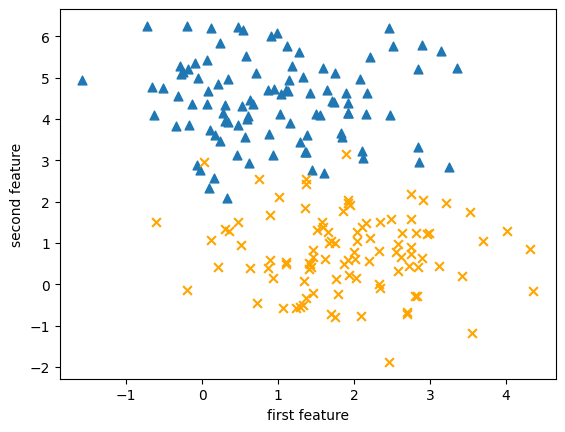

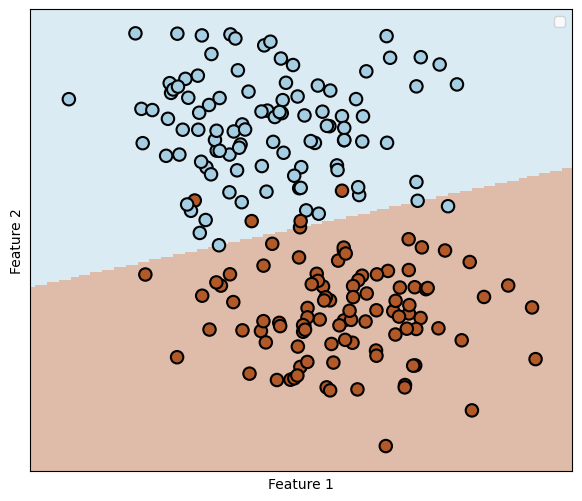

In [ ]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label='0', marker='^')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label='1', c='orange', marker='x')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_decision_regions(classifier, X, y)
plt.legend(loc='upper right');



Podemos obtener otras métricas como F-Score, etc.

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

print('Precision:', precision_score(y_test, prediction))
print('Recall:   ', recall_score(y_test, prediction))
print('Fscore:   ', f1_score(y_test, prediction))

Precision: 0.9565217391304348
Recall:    0.88
Fscore:    0.9166666666666666




Además es posible obtener los parámetros de la regresión:

In [ ]:
print(classifier.intercept_)
print(classifier.coef_)

[5.14609874]
[[ 0.89634307 -2.62074832]]
